In [24]:
# libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# load data
titanic_df = pd.read_csv('titanic.csv')

# verify load
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


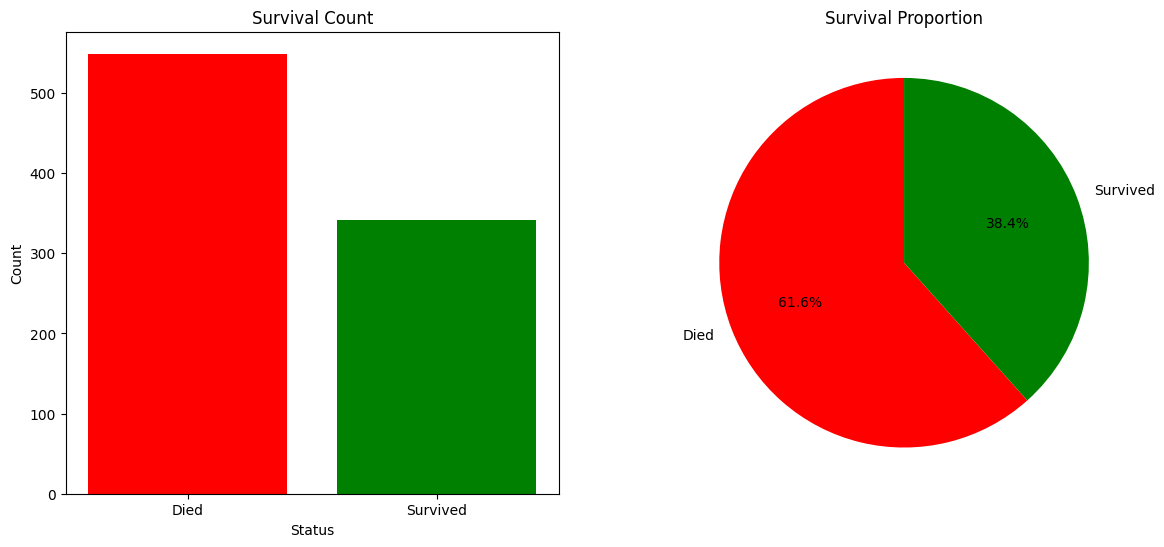

In [26]:
# General data exploration
# Create subplots for the two charts
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot of survival count
counts = titanic_df['Survived'].value_counts()
axs[0].bar(['Died', 'Survived'], counts, color=['red', 'green'])
axs[0].set_title('Survival Count')
axs[0].set_xlabel('Status')
axs[0].set_ylabel('Count')

# Pie chart of survival proportion
axs[1].pie(counts, labels=['Died', 'Survived'], colors=['red', 'green'], autopct='%1.1f%%', startangle=90)
axs[1].set_title('Survival Proportion')

plt.show()



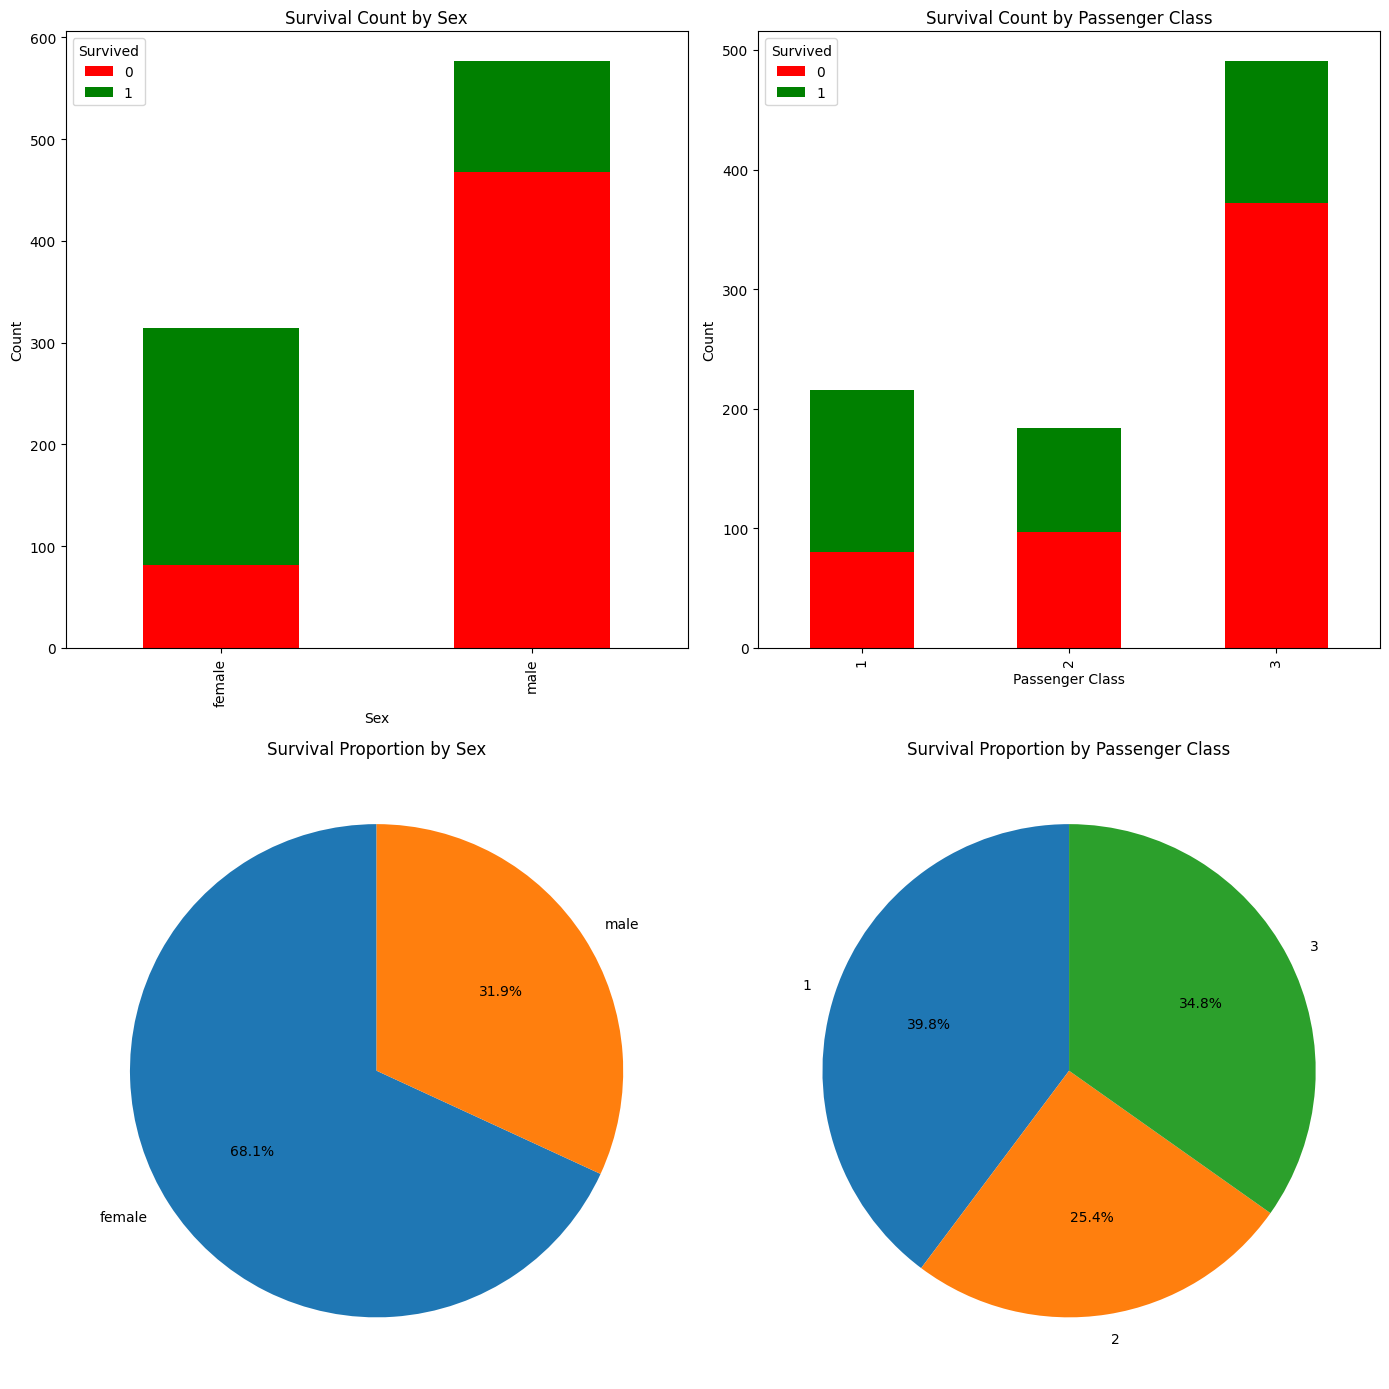

In [27]:
# Create subplots for the four charts
fig, axs = plt.subplots(2, 2, figsize=(14, 14))

# Bar plot of survival count by Sex
sex_counts = titanic_df.groupby('Sex')['Survived'].value_counts().unstack()
sex_counts.plot(kind='bar', stacked=True, color=['red', 'green'], ax=axs[0, 0])
axs[0, 0].set_title('Survival Count by Sex')
axs[0, 0].set_xlabel('Sex')
axs[0, 0].set_ylabel('Count')

# Bar plot of survival count by Pclass
class_counts = titanic_df.groupby('Pclass')['Survived'].value_counts().unstack()
class_counts.plot(kind='bar', stacked=True, color=['red', 'green'], ax=axs[0, 1])
axs[0, 1].set_title('Survival Count by Passenger Class')
axs[0, 1].set_xlabel('Passenger Class')
axs[0, 1].set_ylabel('Count')

# Pie chart of survival proportion by Sex
sex_survived = titanic_df[titanic_df['Survived'] == 1]['Sex'].value_counts()
axs[1, 0].pie(sex_survived, labels=sex_survived.index, autopct='%1.1f%%', startangle=90)
axs[1, 0].set_title('Survival Proportion by Sex')

# Pie chart of survival proportion by Pclass
class_survived = titanic_df[titanic_df['Survived'] == 1]['Pclass'].value_counts().sort_index()
axs[1, 1].pie(class_survived, labels=class_survived.index, autopct='%1.1f%%', startangle=90)
axs[1, 1].set_title('Survival Proportion by Passenger Class')

plt.tight_layout()
plt.show()


In [ ]:
# Create subplots for the five charts
fig, axs = plt.subplots(3, 2, figsize=(14, 21))

# Bar plot of survival count by Embarked
embarked_counts = titanic_df.groupby('Embarked')['Survived'].value_counts().unstack()
embarked_counts.plot(kind='bar', stacked=True, color=['red', 'green'], ax=axs[0, 0])
axs[0, 0].set_title('Survival Count by Embarked Port')
axs[0, 0].set_xlabel('Embarked Port')
axs[0, 0].set_ylabel('Count')

# Histogram of Age by Survived
titanic_df[titanic_df['Survived'] == 0]['Age'].plot(kind='hist', bins=30, alpha=0.5, color='red', ax=axs[0, 1])
titanic_df[titanic_df['Survived'] == 1]['Age'].plot(kind='hist', bins=30, alpha=0.5, color='green', ax=axs[0, 1])
axs[0, 1].set_title('Age Distribution by Survival')
axs[0, 1].set_xlabel('Age')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].legend(['Died', 'Survived'])

# Histogram of Fare by Survived
titanic_df[titanic_df['Survived'] == 0]['Fare'].plot(kind='hist', bins=30, alpha=0.5, color='red', ax=axs[1, 0])
titanic_df[titanic_df['Survived'] == 1]['Fare'].plot(kind='hist', bins=30, alpha=0.5, color='green', ax=axs[1, 0])
axs[1, 0].set_title('Fare Distribution by Survival')
axs[1, 0].set_xlabel('Fare')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].legend(['Died', 'Survived'])

# Pie chart of survival proportion by Embarked
embarked_survived = titanic_df[titanic_df['Survived'] == 1]['Embarked'].value_counts()
axs[1, 1].pie(embarked_survived, labels=embarked_survived.index, autopct='%1.1f%%', startangle=90)
axs[1, 1].set_title('Survival Proportion by Embarked Port')

# Remove unused subplot
fig.delaxes(axs[2, 0])
fig.delaxes(axs[2, 1])

plt.tight_layout()
plt.show()


In [ ]:
""" 
PassengerId: An unique identifier for each passenger
Survived: Whether the passenger survived (1) or not (0)
Pclass: The passenger's class (1, 2, or 3)
Name: The passenger's name
Sex: The passenger's gender (male or female)
Age: The passenger's age
SibSp: The number of siblings/spouses the passenger had aboard
Parch: The number of parents/children the passenger had aboard
Ticket: The passenger's ticket number
Fare: The fare the passenger paid
Cabin: The cabin number of the passenger
Embarked: The port where the passenger embarked (C = Cherbourg; Q = Queenstown; S = Southampton)
"""

In [14]:
import folium

# Create a map centered around the general area of the ports
m = folium.Map(location=[50.9097, -1.4043], zoom_start=3)

# Count the number of passengers from each embarkation point
counts = titanic_df['Embarked'].value_counts()

# Define the coordinates and order for each port
locations = {
    'S': [50.9097, -1.4043],  # Southampton
    'C': [49.6444, -1.6054],  # Cherbourg
    'Q': [51.8503, -8.2943],  # Queenstown
    'I': [51.4666, -55.7817],  # Iceberg collision site
    'N': [40.7128, -74.0060]   # New York City
}

# Define the order of ports visited
route = ['S', 'C', 'Q', 'I', 'N']

# Add a circle for each port, scaled by the number of passengers that embarked there
for port, count in counts.items():
    if port in ['S', 'C', 'Q']:
        folium.CircleMarker(
            location=locations[port],
            radius=10,  # Fixed radius for all markers
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
            tooltip=f'Port: {port}, Passengers: {count}'
        ).add_to(m)

# Draw the intended path (Queenstown to New York City) in green
folium.PolyLine([locations['Q'], locations['N']], color="green", weight=2.5, opacity=1, dash_array='5').add_to(m)

# Display the map
m


In [15]:
# Determine the group of people leased likely to survive
titanic_df['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [ ]:
""" 
The mean of 0.38 indicates that only 38% of the passengers survived.


"""

In [16]:
# Group the data by 'Pclass', 'Sex', and 'Embarked', and calculate the mean survival rate within each group
grouped = titanic_df.groupby(['Pclass', 'Sex', 'Embarked'])['Survived'].mean()

# Sort the groups by survival rate in ascending order
grouped_sorted = grouped.sort_values()

# Display the sorted groups
grouped_sorted


Pclass  Sex     Embarked
1       male    Q           0.000000
2       male    Q           0.000000
3       male    Q           0.076923
                S           0.128302
2       male    S           0.154639
                C           0.200000
3       male    C           0.232558
1       male    S           0.354430
3       female  S           0.375000
1       male    C           0.404762
3       female  C           0.652174
                Q           0.727273
2       female  S           0.910448
1       female  S           0.958333
                C           0.976744
2       female  C           1.000000
1       female  Q           1.000000
2       female  Q           1.000000
Name: Survived, dtype: float64

In [19]:
bros_3rd_class = titanic_df[(titanic_df['Sex'] == 'male') & (titanic_df['Pclass'] == 3) & (titanic_df['Embarked'] == 'Q')]

bros_3rd_class.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
46,47,0,3,"Lennon, Mr. Denis",male,NaN,1,0,370371,15.5000,NaN,Q
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
126,127,0,3,"McMahon, Mr. Martin",male,NaN,0,0,370372,7.7500,NaN,Q


In [20]:
# DEV check
len(bros_3rd_class)

39

In [21]:
# reindex inplace
bros_3rd_class.reset_index(drop=True, inplace=True)

#print it
bros_3rd_class

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
1,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
2,47,0,3,"Lennon, Mr. Denis",male,NaN,1,0,370371,15.5000,NaN,Q
3,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
4,127,0,3,"McMahon, Mr. Martin",male,NaN,0,0,370372,7.7500,NaN,Q
5,144,0,3,"Burke, Mr. Jeremiah",male,19.0,0,0,365222,6.7500,NaN,Q
6,172,0,3,"Rice, Master. Arthur",male,4.0,4,1,382652,29.1250,NaN,Q
7,189,0,3,"Bourke, Mr. John",male,40.0,1,1,364849,15.5000,NaN,Q
8,197,0,3,"Mernagh, Mr. Robert",male,NaN,0,0,368703,7.7500,NaN,Q
9,215,0,3,"Kiernan, Mr. Philip",male,NaN,1,0,367229,7.7500,NaN,Q


In [23]:
""" 
Group least likely to survive:
Men in 3rd class who embarked from Queenstown     
"""

# DEV check
len(bros_3rd_class)

39